In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer
import sklearn
boston = load_boston()

In [43]:
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10
                ,scoring = "neg_mean_squared_error"
               )
#score by minus MES

array([-11.22504076,  -5.3945749 ,  -4.74755867, -22.54699078,
       -12.31243335, -17.18030718,  -6.94019868, -94.14567212,
       -28.541145  , -14.6250416 ])

In [44]:
# 模型評估feature打分列表
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

# 用隨機森林回歸填補缺失值

**創建隨機缺失矩陣**

In [45]:
boston.data.shape

(506, 13)

In [46]:
#506*13=6578筆資料
X_full, y_full = boston.data, boston.target

In [47]:
n_samples,n_features = X_full.shape[0],X_full.shape[1]#(506,13)

In [48]:
#首先確定我們希望放入的缺失數據的比例，在這裡我們假設是50%
rng = np.random.RandomState(0)
missing_rate = 0.5
#向下取整數
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))#3289

In [49]:
missing_features = rng.randint(0,n_features,n_missing_samples) #0-13的整數隨機取3289個
missing_samples = rng.randint(0,n_samples,n_missing_samples) #0-506的整數隨機取3289個

In [50]:
X_missing = X_full.copy()
y_missing = y_full.copy()
X_missing[missing_samples,missing_features] = np.nan

In [51]:
X_missing = pd.DataFrame(X_missing)

In [52]:
X_missing

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.1,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.0,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.3,NaN,1.0,NaN,21.0,393.45,6.48


**劃分訓練集和測試集**

In [53]:
X_missing_reg = X_missing.copy()
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values
sortindex

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11])

In [54]:
X_missing_reg.isnull().sum(axis=0)

0     200
1     201
2     200
3     203
4     202
5     201
6     185
7     197
8     196
9     197
10    204
11    214
12    189
dtype: int64

In [55]:
df = X_missing_reg
#空白處補0，若回歸森林遇到空白值會出錯
df_0 =SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0).fit_transform(df)
#取第6列出來當taget
fill_target = df.iloc[:,6]

In [56]:
# 選非空值處做訓練集
Y_train = fill_target[df.iloc[:,6].notnull()]

# 選空值處做測試集
Y_test = fill_target[df.iloc[:,6].isnull()]

X_train = df_0[Y_train.index]


X_test = df_0[Y_test.index]

In [57]:
Y_train.shape

(321,)

**使用隨機森林做預測**

In [58]:
rfc = RandomForestRegressor(n_estimators=100)
rfc = rfc.fit(X_train, Y_train)
Ypredict = rfc.predict(X_test)

In [59]:
Ypredict

array([7.196, 7.318, 7.212, 7.488, 6.944, 7.046, 7.116, 7.156, 7.056,
       7.203, 7.207, 7.085, 7.316, 7.234, 6.968, 7.152, 7.291, 6.937,
       7.077, 7.121, 7.181, 7.361, 7.327, 7.2  , 7.169, 6.89 , 7.065,
       7.008, 7.178, 6.982, 7.12 , 6.979, 7.012, 7.087, 6.923, 7.284,
       7.077, 7.033, 6.837, 7.424, 6.762, 6.86 , 7.104, 7.118, 6.99 ,
       7.071, 7.101, 7.258, 7.098, 7.045, 7.22 , 7.226, 7.419, 7.242,
       6.906, 7.345, 7.041, 7.097, 7.295, 7.405, 7.182, 7.198, 6.931,
       7.062, 7.036, 7.101, 7.233, 7.151, 7.109, 6.933, 7.394, 7.414,
       7.304, 7.068, 7.081, 7.061, 7.038, 7.005, 7.122, 7.04 , 7.243,
       7.179, 7.452, 7.171, 7.334, 7.186, 7.103, 7.2  , 7.242, 7.379,
       7.094, 7.235, 7.507, 7.217, 7.039, 7.224, 7.258, 7.357, 7.167,
       7.391, 7.098, 7.11 , 6.932, 7.098, 7.244, 7.097, 7.337, 7.382,
       6.944, 7.076, 7.4  , 7.421, 7.245, 6.884, 6.992, 7.142, 6.99 ,
       7.126, 6.858, 7.365, 7.072, 7.146, 7.141, 7.184, 7.299, 7.246,
       7.229, 7.267,

In [60]:
X_missing_reg.loc[X_missing_reg.iloc[:,6].isnull(),6] = Ypredict

In [61]:
#確認缺失值都以填充
X_missing_reg.iloc[:,6].isnull().sum()

0

# 循環用隨機森林預測填上所有欄位

In [85]:
X_missing_reg2 = X_missing.copy()
sortindex = np.argsort(X_missing_reg2.isnull().sum(axis=0)).values
sortindex

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11])

In [86]:
df = X_missing_reg2
fill_target = df.iloc[:, 6]
fill_target.isnull().sum()

185

In [87]:
for i in sortindex:
    df = X_missing_reg2
    fill_target = df.iloc[:, i]

    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)

    df_0 = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0).fit_transform(df)
    
    Y_train = fill_target[fill_target.notnull()]
    Y_test = fill_target[fill_target.isnull()]
    X_train = df_0[Y_train.index, :]
    X_test = df_0[Y_test.index, :]

    
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(X_train, Y_train)
    Ypredict = rfc.predict(X_test)
    X_missing_reg2.loc[X_missing_reg2.iloc[:,i].isnull(),i] = Ypredict

In [88]:
#全部都以隨機森林回歸樹填值
X_missing_reg2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.206518,18.00,7.2435,0.14,0.538000,6.65934,65.200,4.090000,1.00,296.00,17.551,390.9292,4.9800
1,0.027310,0.00,5.9407,0.00,0.469000,6.15830,78.900,4.967100,2.00,293.03,18.328,396.9000,9.1400
2,0.027290,14.03,7.0700,0.00,0.468510,7.18500,61.100,4.428639,2.00,242.00,17.906,391.8530,5.1258
3,0.095807,21.04,3.0124,0.00,0.458000,6.96960,45.800,4.762428,3.73,222.00,18.700,393.7960,5.6627
4,0.160332,0.00,2.1800,0.00,0.463588,7.14700,57.251,4.950026,3.98,255.29,18.700,392.8609,5.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.517054,1.87,10.4398,0.00,0.573000,6.31664,69.100,3.052999,1.00,287.00,21.000,389.6645,9.6700
502,0.045270,0.00,11.9300,0.00,0.573000,6.12000,76.700,2.287500,1.00,273.00,18.969,396.9000,9.0800
503,0.869600,0.69,11.9300,0.18,0.573000,6.97600,91.000,2.313244,5.48,367.90,21.000,379.2319,5.6400
504,0.109590,0.00,11.9300,0.09,0.573000,6.41267,89.300,2.750437,1.00,255.20,21.000,393.4500,6.4800


# 與其他填值方法比較

使用平均值填值

In [25]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_missing_mean = imp_mean.fit_transform(X_missing)
pd.DataFrame(X_missing_mean).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

使用眾數填值

In [27]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_missing_mode = imp_mode.fit_transform(X_missing)
pd.DataFrame(X_missing_mode).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

使用中位數填值

In [28]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
X_missing_median = imp_median.fit_transform(X_missing)
pd.DataFrame(X_missing_median).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [30]:
imp_zero = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
X_missing_zero = imp_zero.fit_transform(X_missing)
pd.DataFrame(X_missing_zero).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [89]:
#X = [原始資料, 平均數填充, 眾數填充, 中位數填充, 零填充, 隨機森林填充]
X = [X_full, X_missing_mean, X_missing_mode, X_missing_median ,X_missing_zero, X_missing_reg2]

mse = []
for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)
    scores = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error',
                            cv=5).mean()
    mse.append(scores * -1)
mse

[21.571667100368845,
 40.848037216676374,
 46.693234434743175,
 43.75194526953989,
 49.626793201980185,
 17.82257428394486]

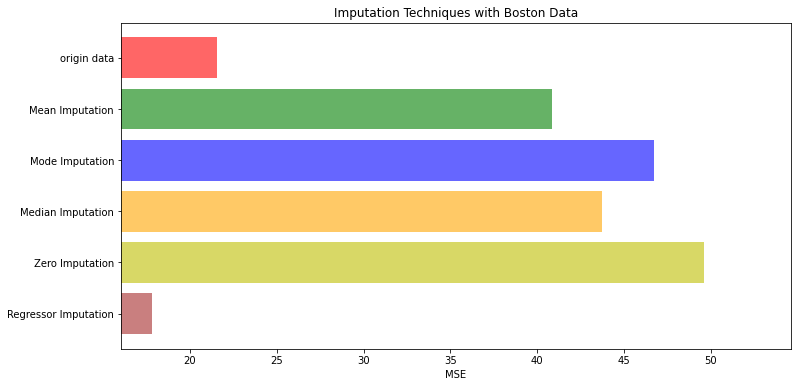

In [90]:
import matplotlib.pyplot as plt
x_labels = ['origin data',
            'Mean Imputation',
            'Mode Imputation',
            'Median Imputation',
            'Zero Imputation',
            'Regressor Imputation']
colors = ['r', 'g', 'b', 'orange', 'y', 'brown']

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)

for i in np.arange(len(mse)):
    
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center')

ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) * 0.9,
            right=np.max(mse) * 1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.invert_yaxis()


ax.set_yticklabels(x_labels)
plt.show()